# I Campus de Verano Centro Público Integrado de FP - Open AI Whisper

Cuaderno jupyter realizado originalmente por David Torelli y actualizado por Luis José Sánchez.

Última revisión: 12/11/2024

 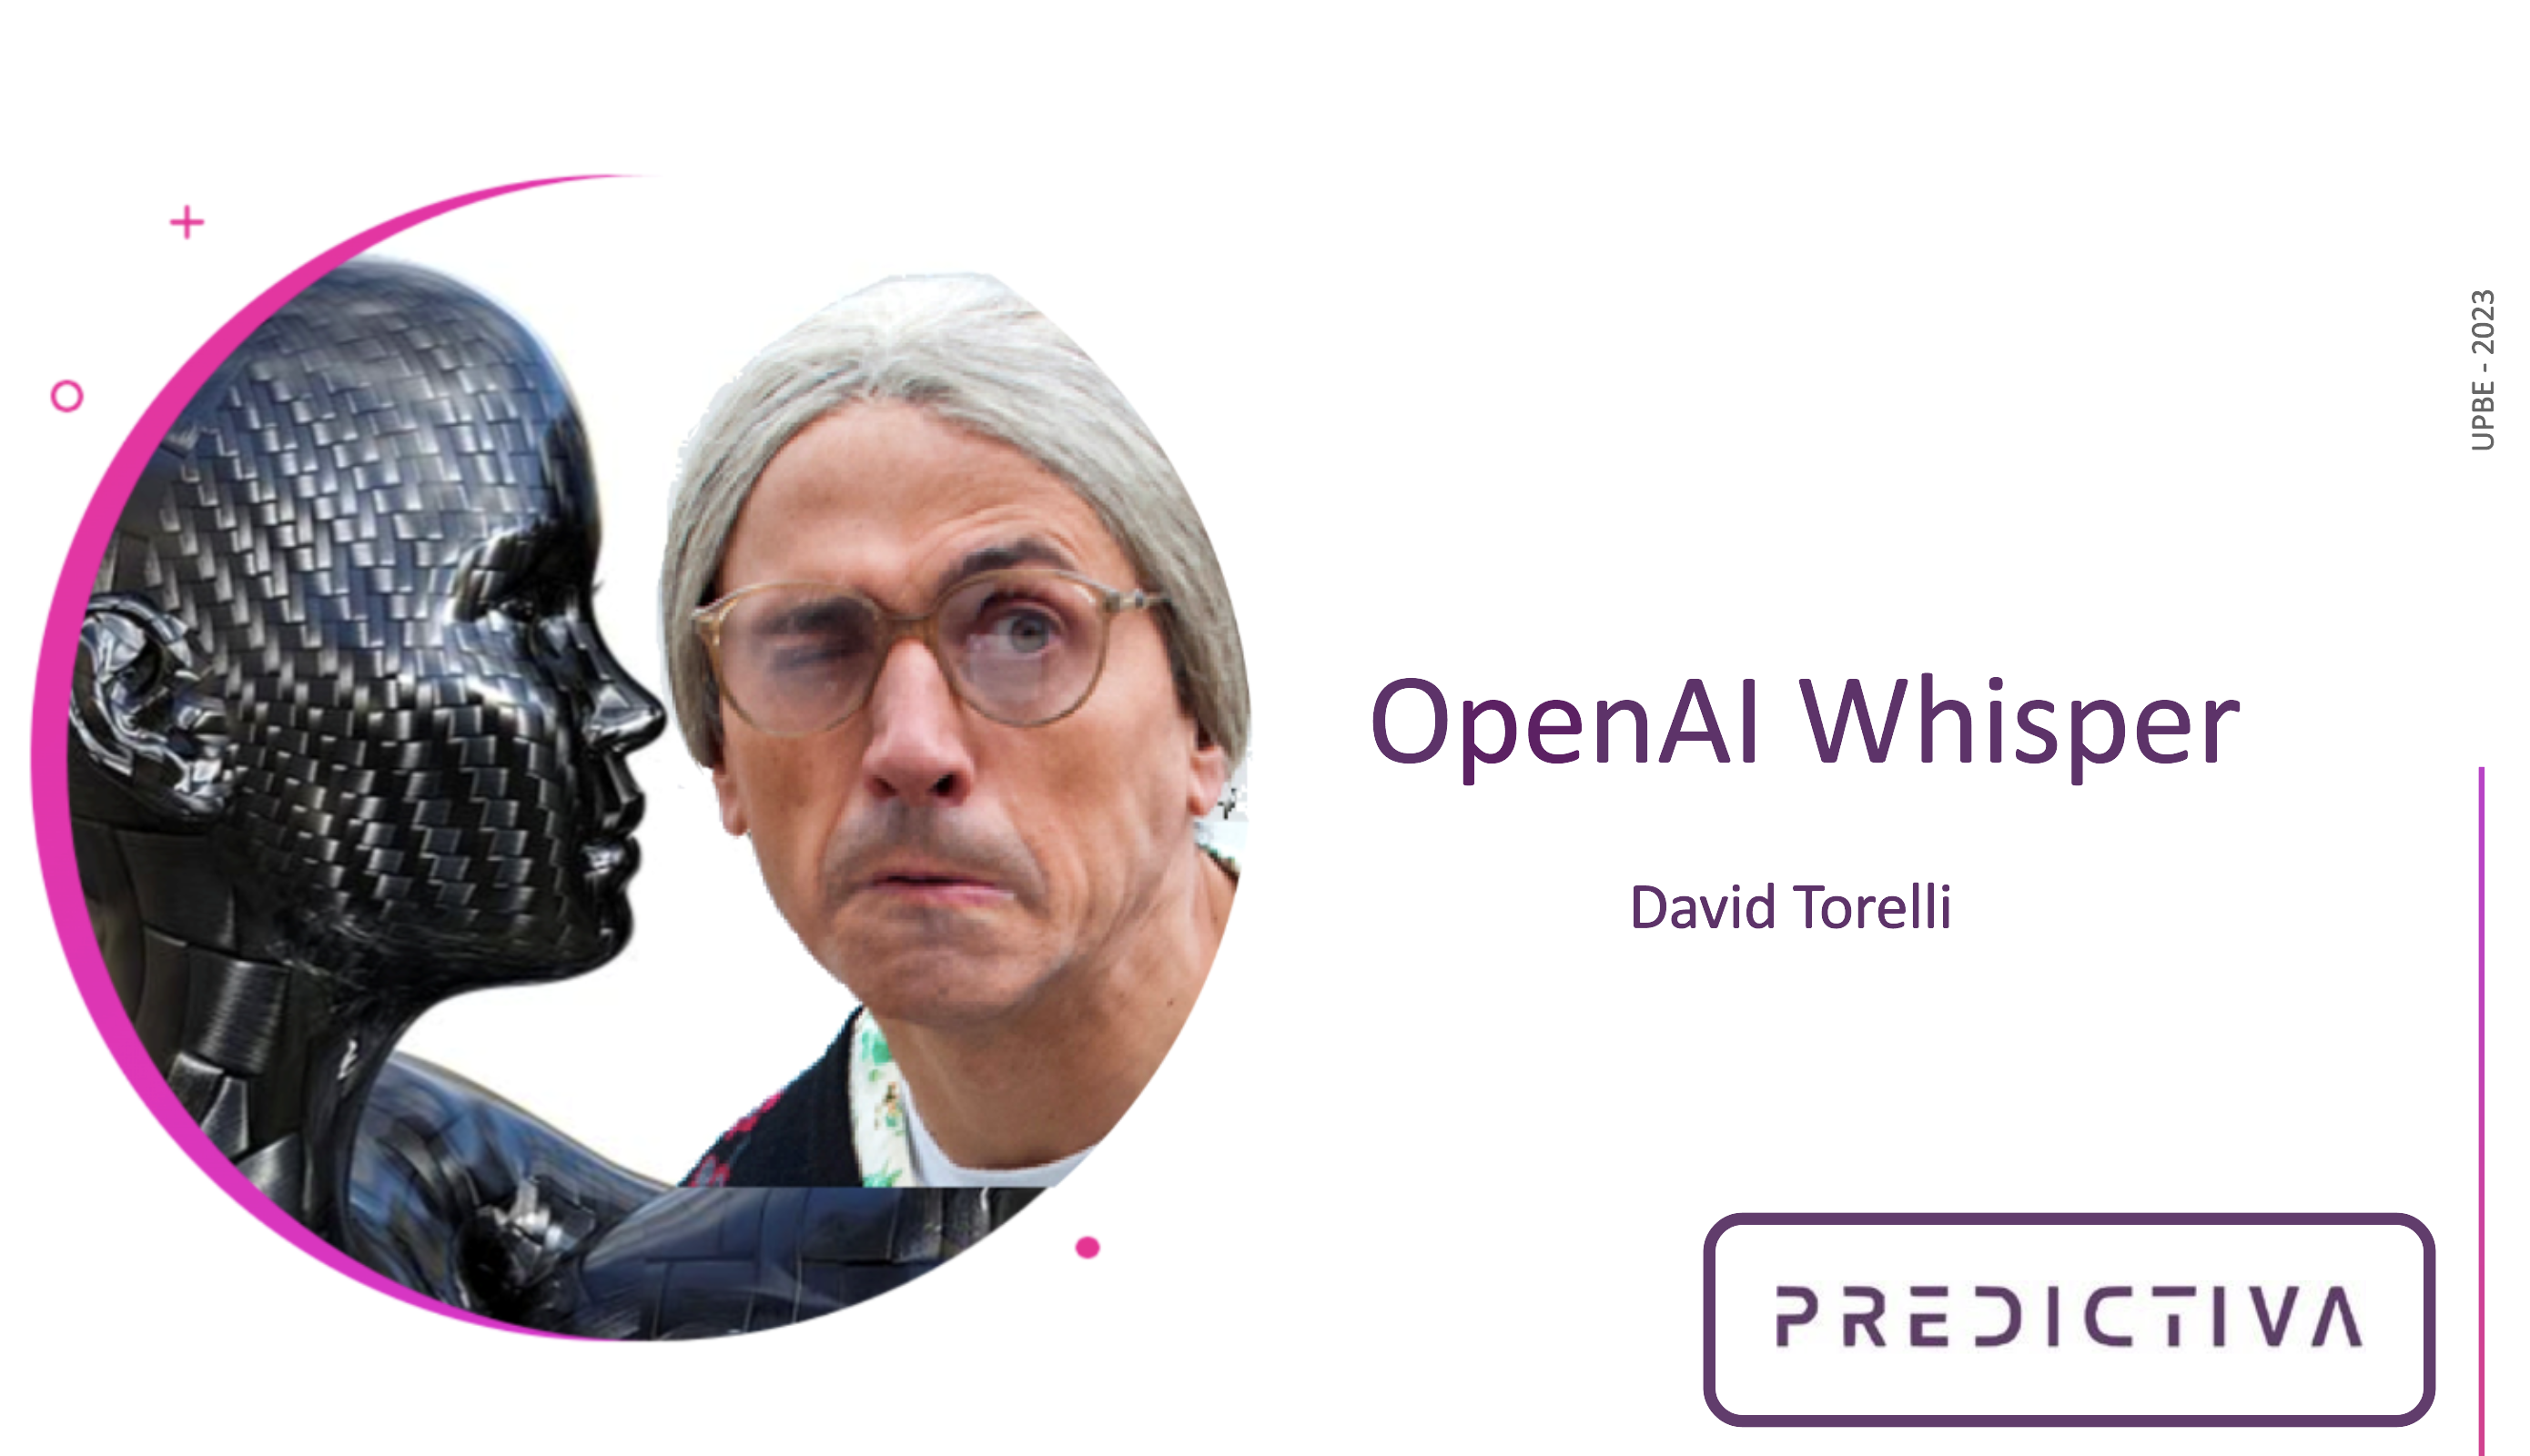

# Introducción a Whisper
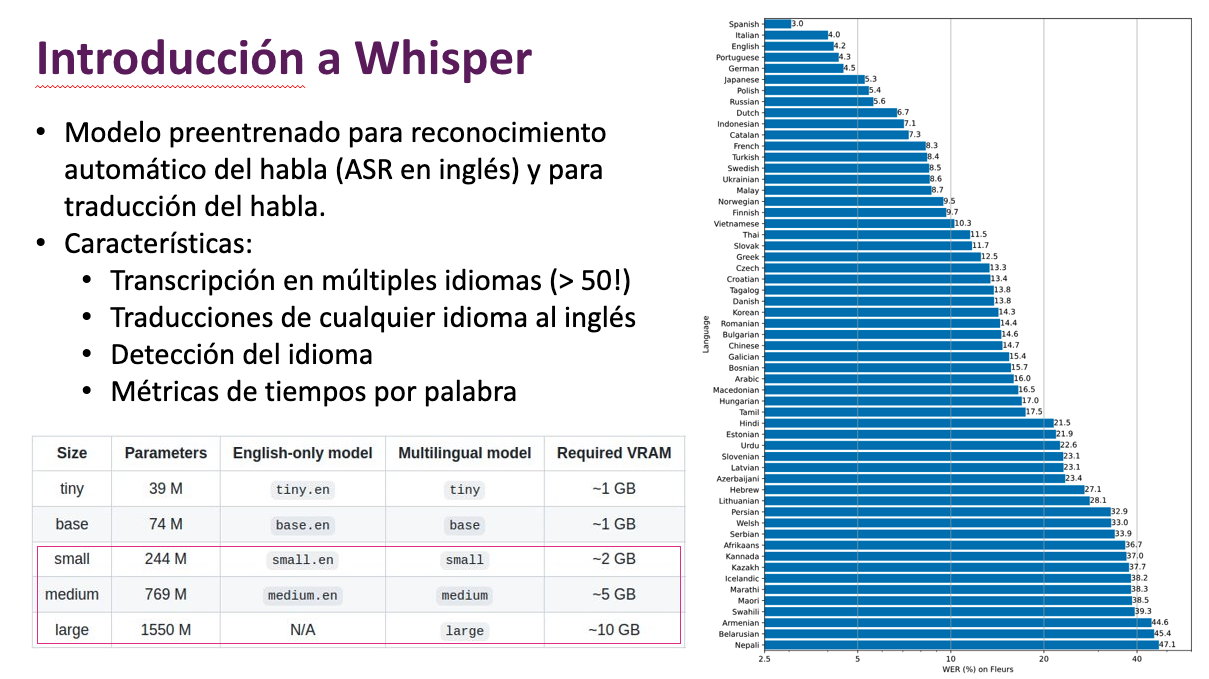

## Prepara tu entorno con las librerias requeridas (whisper, pytube y ffmpeg)

In [1]:
!pip install git+https://github.com/openai/whisper.git
!pip install git+https://github.com/kszczepanskidev/pytube
!sudo apt update && sudo apt install ffmpeg

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-o8ne70hr
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-o8ne70hr
  Resolved https://github.com/openai/whisper.git to commit 173ff7dd1d9fb1c4fddea0d41d704cfefeb8908c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.8 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803557 sha256=3f7a969cb196efee697dce12a10523fd2cf7178e9833cb9a5d6ffa4a0793f06e
  Stored in directory: /tmp/pip-ephem-wheel-cache-4qyl1_6j/wheels/8b/6c/d0/622666868c179f156cf595c8b6f06f88bc5d80c4b31dccaa03
Successfully built openai-whisper
  Cloning https://github.com/kszczepanskidev/pytube to /tmp/pip-req-build-ao6o

## Cargando el modelo small

In [1]:
import whisper

model = whisper.load_model("small")

/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(fp, map_location=device)


## Descargando el audio de youtube con pytube

In [2]:
from pytube import YouTube
import urllib.request

# Define un User-Agent personalizado
opener = urllib.request.build_opener()
opener.addheaders = [('User-Agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36')]
urllib.request.install_opener(opener)

# Accede al video de youtube​
youtube_video = YouTube("https://www.youtube.com/watch?v=Q7wYTwPIOp0")

In [3]:
youtube_video.streams

[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="25fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="135" mime_type="video/mp4" res="480p" fps="25fps" vcodec="avc1.4d401e" progressive="False" type="video">, <Stream: itag="397" mime_type="video/mp4" res="480p" fps="25fps" vcodec="av01.0.04M.08" progressive="False" type="video">, <Stream: itag="134" mime_type="video/mp4" res="360p" fps="25fps" vcodec="avc1.4d4015" progressive="False" type="video">, <Stream: itag="396" mime_type="video/mp4" res="360p" fps="25fps" vcodec="av01.0.01M.08" progressive="False" type="video">, <Stream: itag="395" mime_type="video/mp4" res="240p" fps="25fps" vcodec="av01.0.00M.08" progressive="False" type="video">, <Stream: itag="160" mime_type="video/mp4" res="144p" fps="25fps" vcodec="avc1.4d400b" progressive="False" type="video">, <Stream: itag="394" mime_type="video/mp4" res="144p" fps="25fps" vcodec="av01.0.00M.08" progressive="False" type="video">, <Strea

In [4]:
audio = youtube_video.streams.filter(only_audio=True).first()
audio.download(filename="mm_audio.mp4")

'/content/mm_audio.mp4'

## Transcribiendo con Whisper

In [5]:
# Transcripción
result = model.transcribe("mm_audio.mp4")
print(result["text"])

/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Yo simplemente soy el hombre micro machín, pero esto no es un simple avión, es el fantástico el cargo micro machín, con un gran almacén donde puedes transportar 15 micro machín, cabinas y comportas que se abren y cierran, ascensores rampas y miles de detalles en miniatura, cuidado, cuidado, que despega, cógelo, cógelo! Y este es el genial portaaviones micro machín, con fantásticas gruelas que funcionan de verdad, pista de aterrizaje, dos súper ascensores y brazos de carga. El cargo y portaaviones micro machín, de famosa, recuerda si no son micro machín, no son los auténticos.


### Ejercicio 1: Obtener informacion extendida

Obtener toda información:
* Texto: La transcripción
* Segmentos
    - Posicionamiento
    - Temperatura
    - Tokens
    ...

In [6]:
# Código del ejercicio 1
print(result)

{'text': ' Yo simplemente soy el hombre micro machín, pero esto no es un simple avión, es el fantástico el cargo micro machín, con un gran almacén donde puedes transportar 15 micro machín, cabinas y comportas que se abren y cierran, ascensores rampas y miles de detalles en miniatura, cuidado, cuidado, que despega, cógelo, cógelo! Y este es el genial portaaviones micro machín, con fantásticas gruelas que funcionan de verdad, pista de aterrizaje, dos súper ascensores y brazos de carga. El cargo y portaaviones micro machín, de famosa, recuerda si no son micro machín, no son los auténticos.', 'segments': [{'id': 0, 'seek': 0, 'start': 0.0, 'end': 4.16, 'text': ' Yo simplemente soy el hombre micro machín, pero esto no es un simple avión, es el fantástico', 'tokens': [50364, 7616, 33190, 8812, 806, 26102, 4532, 2246, 10973, 11, 4768, 7433, 572, 785, 517, 2199, 1305, 2560, 11, 785, 806, 4115, 44855, 50572], 'temperature': 0.0, 'avg_logprob': -0.2752842420942328, 'compression_ratio': 1.8920634

### Ejercicio 2: Transcribir un video de otro idioma - Dragon ball https://www.youtube.com/watch?v=FJqGirLjQn4

In [7]:
# Código el ejercicio 2
opener = urllib.request.build_opener()
opener.addheaders = [('User-Agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36')]
urllib.request.install_opener(opener)

# Accede al video de youtube​
youtube_video = YouTube("https://www.youtube.com/watch?v=FJqGirLjQn4")

# 2.1 Extrae el audio y lo guarda en el archivo dragon_ball.mp4
audio = youtube_video.streams.filter(only_audio=True).first()
audio.download(filename="dragon_ball.mp4")

'/content/dragon_ball.mp4'

In [8]:
# 2.2 Extrae el texto a partir del audio y lo muestra por pantalla
result_dragon_ball = model.transcribe("dragon_ball.mp4")
print(result_dragon_ball["text"])

/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Covered by 作詞 作曲 編曲 編曲 原作 編曲 編曲 編曲 編曲 編曲 編曲 編曲 編曲 編曲 編 sfm世界で移動するな秘密サンカーソーで ドアを摩る世界で移動いかいな奇跡この世はでかいたから自慢そうさ 今こそあのベンチョン迷惑の雲の愛がぎっしりひろとり 闇の夢がどさりこの世のどこかで光っているそういつみ ゲイニーゴーゼボーインもう一回 変態もぶっ飛ばし雲の真っ真で 今日も飛ぶのさLet's fly fly fly 今が不思議空を駆け抜け 山を越えLet's fly fly fly 大冒険不思議な度が始まるぜ手に入れろ ボンボール世界で一度手声じゃ追いかけろ ボンボール世界で一度生かしたドラマこの世はでかいたからさそうさ 今こそあのベンチョン


## Traduciendo al inglés

Hay diferentes tareas a la hora de realizar una transcripción. Dado un modelo podemos obtener la tranducción de un audio a través del método `transcribe` y haciendo uso del parámetro `translate`. Como puedes ver se usa el mismo método para transcribir que para traducir:

```python
model.transcribe(audio_file, task="translate")
```

* task="transcribe"
* task="translate"



### Ejercicio 3: Realiza la traducción del texto del video del ejercicio 1 y 2.

In [9]:
# Código del ejercicio 3

# 3.1 Muestra la traducción al inglés del vídeo del anuncio de Micro Machines
translation = model.transcribe("mm_audio.mp4", task="translate")
print(translation["text"])

/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 I'm just the Micro Machin Man, but this is not a simple plane, it's the Fantastico Air Cargo Micro Machin. With a great armament you can transport 15 Micro Machin, cabinets and doors that open and close, similar sensors, details in miniature, be careful, be careful, take it off, take it off! And this is the great Micro Machin airplane with real fantastic screws that work, landing track, two super sensors and carrier arms. Air Cargo and Micro Machin Air Cargo are famous, remember if they are not Micro Machins, they are not the real ones.


In [10]:
# 3.2 Muestra la traducción al inglés del vídeo de Bola de Dragón
translation = model.transcribe("dragon_ball.mp4", task="translate")
print(translation["text"])

/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Dio relationships The adventure of the night The dream of the night sky is shining The dream of the night sky is shining The dream of the night sky is shining somewhere in this world The sun is shining, the sky is shining The sun is shining, the sky is shining The sky is shining, the sky is shining The sun of the night sky is shining Let's fly, fly, try, the sky is full of clouds The sky is full of clouds Let's fly, fly, fly, the adventure The mysterious party begins Come on, let's go! Come on, let's go to the world Come on, let's go! Let's go to the world, the drama has been born The world is big, so Yes, now it's the adventure


### Ejercicio 4: Buscad un audio que ponga a prueba la tecnología - Whisper vs Chiquito de la Calzada

In [16]:
# Código del ejercicio 4. Transcripción de un video de Chiquito de la Calzada.
# Accede al video de youtube​
youtube_video = YouTube("https://www.youtube.com/watch?v=FMpXuWNG9ng")

# Extrae el audio y lo guarda en el archivo chiquito.mp4
audio = youtube_video.streams.filter(only_audio=True).first()
audio.download(filename="chiquito.mp4")

# Muestra el texto del video
result_chiquito = model.transcribe("chiquito.mp4")

/usr/local/lib/python3.10/dist-packages/stable_whisper/whisper_compatibility.py:270: UserWarning: The installed version of Whisper might be incompatible.
The detected version appears to be installed from the repository which can have compatibility issues due to multiple commits sharing the same version number. It is recommended to install version 20240930 from PyPI.
To prevent errors and performance issues, install the latest compatible version: `pip install openai-whisper==20240930` 
Use `ignore_compatibility=True` to ignore this warning. Or use transcribe_minimal().
  warnings.warn(compatibility_warning)
/usr/local/lib/python3.10/dist-packages/stable_whisper/whisper_word_level/original_whisper.py:245: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
Transcribe:   0%|          | 0/73.84 [00:10<?, ?sec/s]

Detected language: spanish


Transcribe: 100%|██████████| 73.84/73.84 [01:08<00:00,  1.08sec/s]


In [18]:
print(result_chiquito.text)

 No puedo, no puedo, no puedo. Uno que iba por la calle, museriamente, eso amatóme en el sobaco, no podía andar. Esa pómula de ojo, diodenar, iba solo, muserio, con un ojo insao. Muserio andando y se encuentra un... ¡Manolo! ¡Manolo! Dice ¿Qué pasa? ¿Qué está pasando en el fiste del ojo? Dice cállate que mi muestra está prendiendo cinturón negro. Carasteque, ya está chica. ¿Ya es la verdad? Por la gru, mi padre no ve a lo que es. Pero bueno, eso, pero eso, ¿qué? Dice porque yo le he dicho que tiene la media arrugal. Y por eso también, tío, ¿está más cá? Sí. Es que dio la concedencia que a aquel día no llevaba media. Cobamos desde la cadera.


## Identificando idiomas de forma automática

In [11]:
# Carga y normaliza el audio​ (lo deja en 30 segundos)
audio = whisper.load_audio("mm_audio.mp4")
audio_normalizado = whisper.pad_or_trim(audio)

# Convierte el audio normalizado en un espectrograma que es una representación
# visual del contenido de frecuencia de la señal de audio a lo largo del tiempo.
# Es el tipo de entrada que el modelo Whisper necesita para procesar el audio.
mel = whisper.log_mel_spectrogram(audio_normalizado).to(model.device)

# Detecta el idioma​
_, probs = model.detect_language(mel)
print(f"Idioma detectado: {max(probs, key=probs.get)}")

Idioma detectado: es


### Ejercicio 5: Listar todas las probabilidades (de mayor a nenor) de los idiomas soportados devueltas en la variable probs

In [12]:
# Código del ejercicio 5
probs = dict(sorted(probs.items(), key=lambda item: item[1], reverse=True))
probs

{'es': 0.5281141996383667,
 'gl': 0.41133734583854675,
 'ca': 0.021921206265687943,
 'en': 0.00840357318520546,
 'cy': 0.003593606874346733,
 'el': 0.0027995258569717407,
 'nn': 0.0023284151684492826,
 'pt': 0.002234317362308502,
 'nl': 0.0020847965497523546,
 'fr': 0.0019222776172682643,
 'eu': 0.0018504742765799165,
 'ru': 0.001633248059079051,
 'pl': 0.0014870496233925223,
 'la': 0.0012555121211335063,
 'it': 0.0011053523048758507,
 'ja': 0.0010363156907260418,
 'oc': 0.0008343772497028112,
 'de': 0.0007759981090202928,
 'tr': 0.0007402831688523293,
 'jw': 0.0006564315408468246,
 'br': 0.0006359192193485796,
 'fi': 0.0006216391921043396,
 'ko': 0.0004866164526902139,
 'ar': 0.00047899631317704916,
 'sv': 0.00019611456082202494,
 'km': 0.00014324764197226614,
 'da': 0.00010928377014352009,
 'ro': 0.00010155473864870146,
 'vi': 8.631036325823516e-05,
 'hu': 8.220404561143368e-05,
 'bn': 7.611983164679259e-05,
 'mi': 7.462754001608118e-05,
 'sn': 7.37066293368116e-05,
 'zh': 7.31994659

### Ejercicio 6: Probad todo lo anterior con el modelo tiny y base y comparad resultados

### Modelo tiny

### Modelo base

### Ejercicio 7: Creando un generador de subtitulos automaticos para videos de Youtube

Librería que estabiliza las marcas de tiempo de whisper:
https://github.com/jianfch/stable-ts

In [13]:
!pip install -U git+https://github.com/jianfch/stable-ts.git

  Cloning https://github.com/jianfch/stable-ts.git to /tmp/pip-req-build-d_pc9crw
  Running command git clone --filter=blob:none --quiet https://github.com/jianfch/stable-ts.git /tmp/pip-req-build-d_pc9crw
  Resolved https://github.com/jianfch/stable-ts.git to commit 7dab1714c5915e3efe070ae697ade1d04f5c8c42
  Preparing metadata (setup.py) ... done
  Created wheel for stable-ts: filename=stable_ts-2.17.5-py3-none-any.whl size=136044 sha256=ff1ec903d106cd165c824ae673ea9113f05fd4bb525f29ed155234a479f22ffc
  Stored in directory: /tmp/pip-ephem-wheel-cache-ipz9euca/wheels/5a/48/64/a463d57ac05105e1692e3649ca76cea98a8867262d7b32dd86
Successfully built stable-ts


In [14]:
# Descarga el video
youtube_video = YouTube("https://www.youtube.com/watch?v=Q7wYTwPIOp0")
video = youtube_video.streams.get_highest_resolution()
video.download(filename="mm_video.mp4")

'/content/mm_video.mp4'

In [15]:
import stable_whisper

# Genera los subtitulos
model = stable_whisper.load_model("small")
result = model.transcribe("mm_audio.mp4")
result.to_srt_vtt("mm_audio.srt")

/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(fp, map_location=device)
/usr/local/li

Detected language: spanish


Transcribe: 100%|██████████| 20.9/20.9 [00:37<00:00,  1.78s/sec]

Saved: /content/mm_audio.srt


# Referencias

* Whisper: https://github.com/openai/whisper  ​
* PyTube: https://github.com/pytube/pytube​
* Hugginng Face: https://huggingface.co/docs/transformers/model_doc/whisper​

# Otros enlaces de interés

* LabLab.ai: https://lablab.ai/t/whisper-api-flask-docker​
* Voice Box: https://voicebox.metademolab.com/​